### EDA with Target Labels and Feature Creation

In [2]:
%%capture
!pip install numpy
!pip install pandas
!pip install boto3
!pip install matplotlib
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import boto3
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.4f}'.format

### Loading Data via S3

In [8]:
bucket='ads-508-group-6-processed'
data_key = 'customers.csv'

s3 = boto3.client('s3')
customers_obj = s3.get_object(Bucket = bucket, Key = data_key)

df = pd.read_csv(customers_obj['Body'])

### Loading Data Locally

In [9]:
#df = pd.read_csv("..\\data\\customers_processed_part_3.csv")

In [11]:
df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,quarter_articles_purchased,quarter_amount_spent,qmc_sales_channel,qmc_product_type,...,lfmc_perceived_colour_master,lfmc_department,lfmc_index,lfmc_index_group,lfmc_section,lfmc_garment_group,days_since_last_purchase,lifetime_average_amount_spent_per_article,lifetime_average_days_between_purchase,churn
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0000,0.0000,ACTIVE,NONE,49.0000,5,0.0936,2,252,...,5,1212,A,1,11,1005,10,0.0299,0.0444,1.0000
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0000,0.0000,ACTIVE,NONE,25.0000,19,0.4726,2,59,...,2,4242,B,1,60,1018,30,0.0315,0.1347,0.0000
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0000,0.0000,ACTIVE,NONE,24.0000,3,0.0694,2,59,...,5,4242,B,1,60,1017,57,0.0307,0.0140,0.0000
3,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,0.0000,0.0000,ACTIVE,NONE,20.0000,2,0.0534,1,254,...,5,1447,D,2,53,1003,86,0.0267,0.0000,1.0000
4,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,1.0000,1.0000,ACTIVE,Regularly,56.0000,21,0.6582,2,272,...,5,1722,A,1,15,1009,12,0.0320,0.2110,0.0000


In [12]:
cat_variables = ['club_member_status',
                 'fashion_news_frequency', 
                 'qmc_sales_channel',
                 'qmc_product_type',
                 'qmc_graphical_appearance',
                 'qmc_perceived_colour_value',
                 'qmc_perceived_colour_master',
                 'qmc_department',
                 'qmc_index',
                 'qmc_index_group',
                 'qmc_section',
                 'qmc_garment_group',                  
                 'lfmc_sales_channel',
                 'lfmc_product_type',
                 'lfmc_graphical_appearance',
                 'lfmc_perceived_colour_value',
                 'lfmc_perceived_colour_master',
                 'lfmc_department',
                 'lfmc_index',
                 'lfmc_index_group',
                 'lfmc_section',
                 'lfmc_garment_group']

num_variables = ['age', 
                 'lifetime_articles_purchased', 
                 'lieftime_amount_spent', 
                 'lifetime_average_amount_spent_per_article', 
                 'lifetime_average_days_between_purchase',  
                 'quarter_articles_purchased', 
                 'quarter_amount_spent', 
                 'quarter_average_amount_spent_per_article', 
                 'quarter_average_days_between_purchase', 
                 'days_since_last_purchase']

## Univariate EDA

### Categorical Data

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


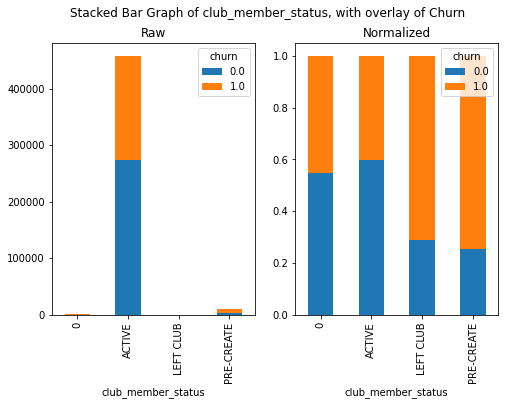

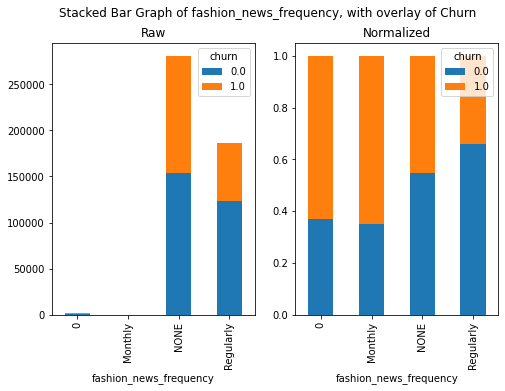

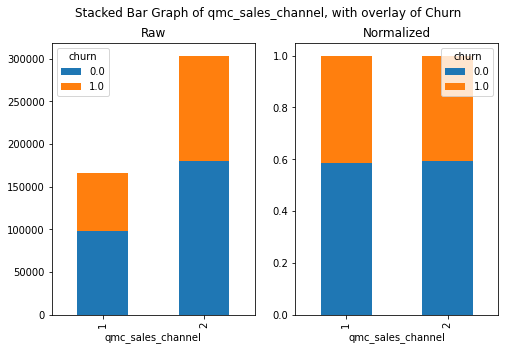

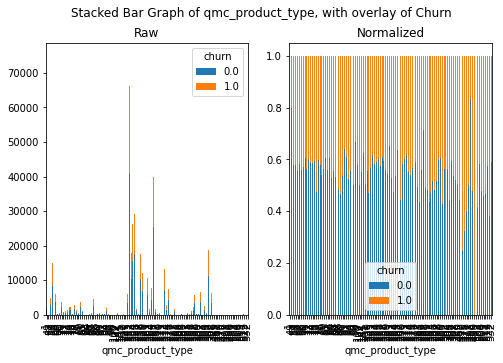

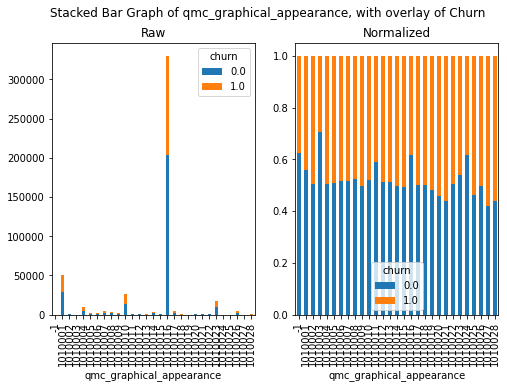

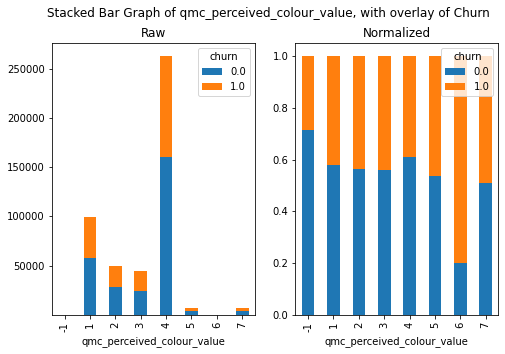

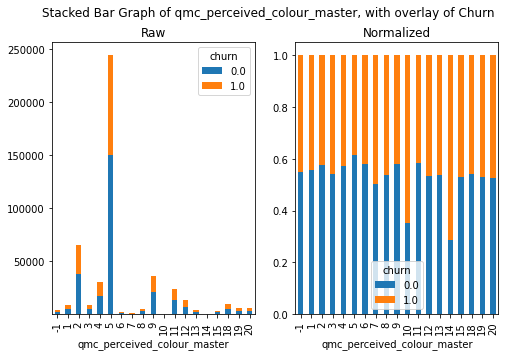

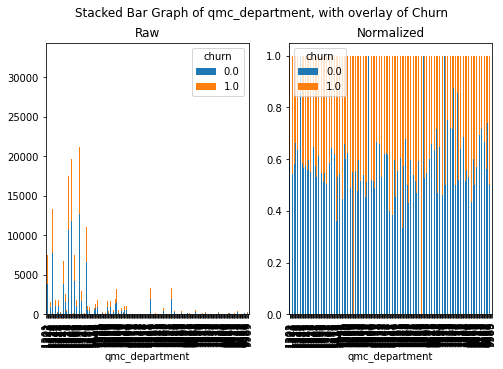

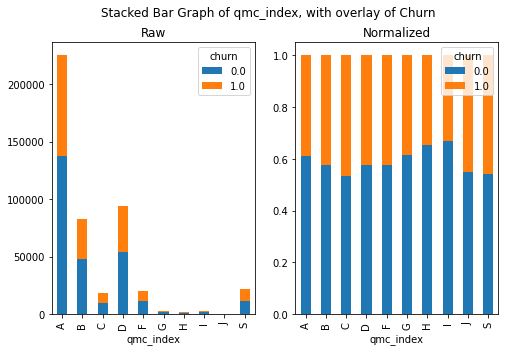

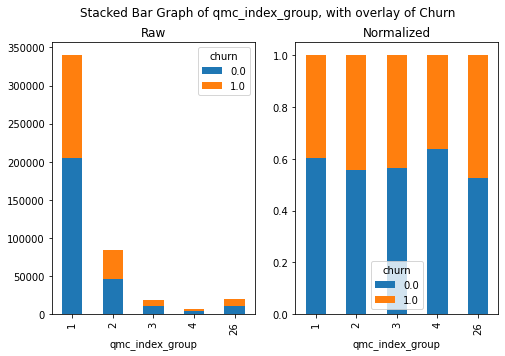

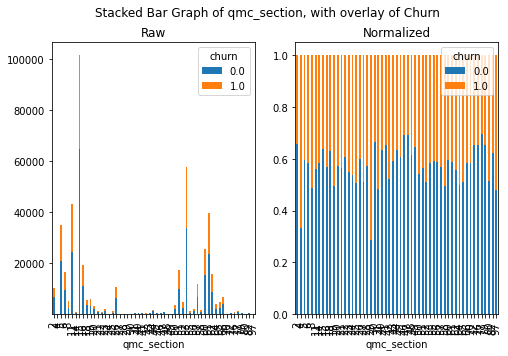

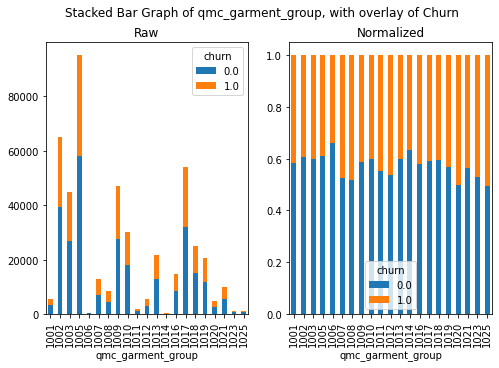

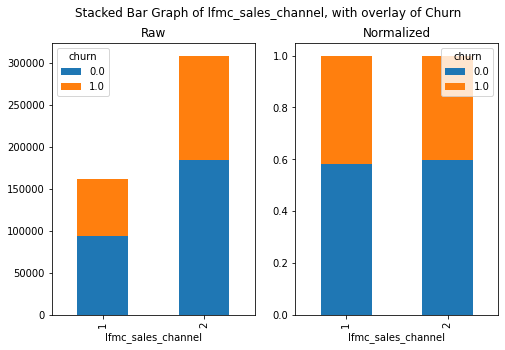

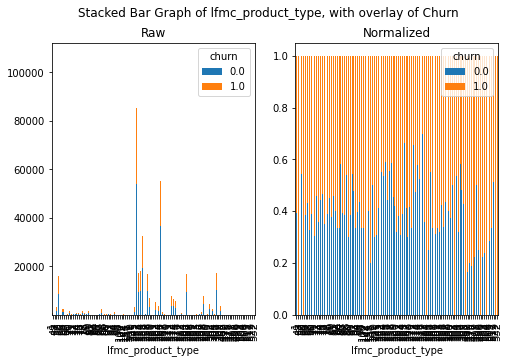

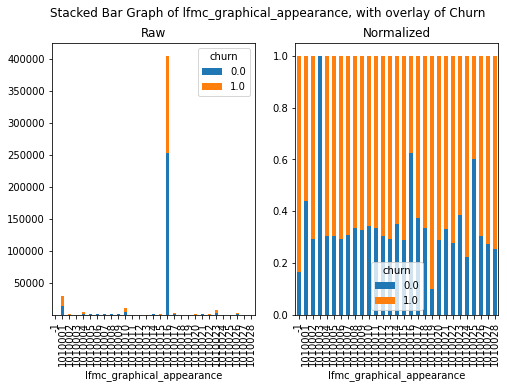

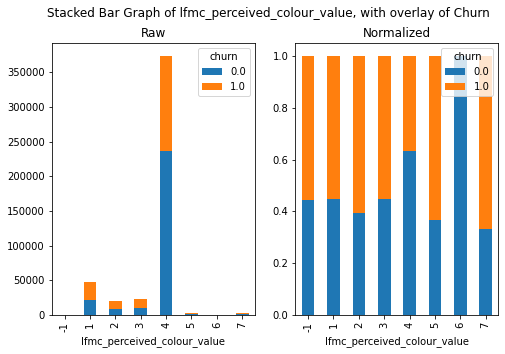

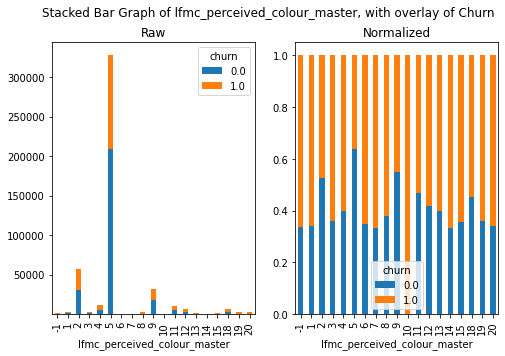

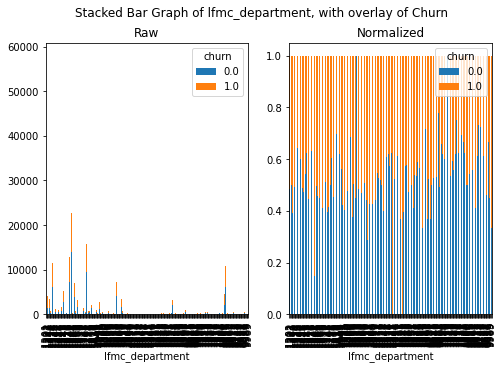

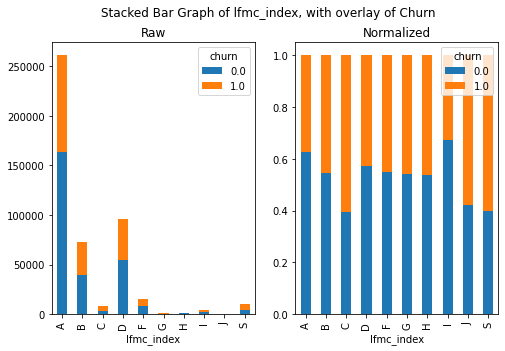

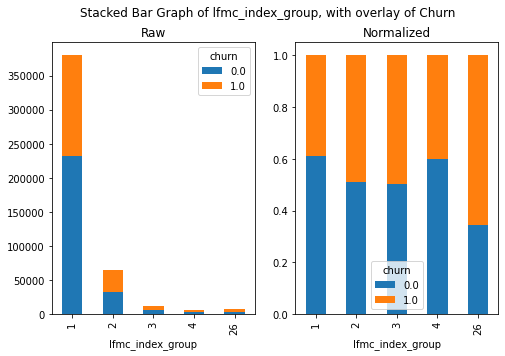

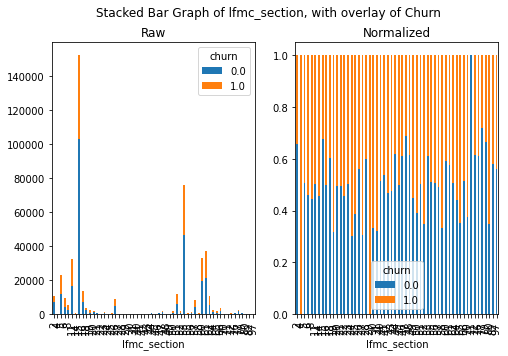

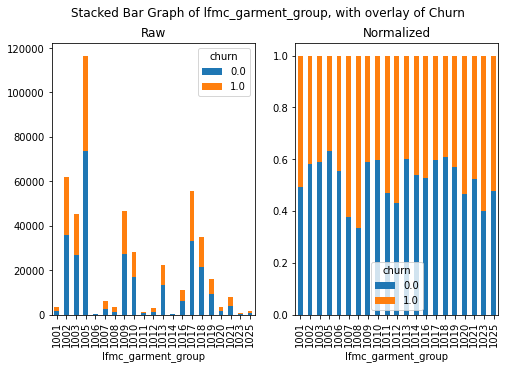

In [13]:
for col in cat_variables:
    crosstab = pd.crosstab(df[col], df['churn'])
    crosstab_norm = crosstab.div(crosstab.sum(1), axis = 0)
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols= 2)
    fig.suptitle('Stacked Bar Graph of {}, with overlay of Churn'.format(col))
    ax1.set_title('Raw')
    crosstab.plot(kind = 'bar', ax = ax1, stacked = True, figsize = (8,5), sort_columns = True)
    ax2.set_title('Normalized')
    crosstab_norm.plot(kind = 'bar', ax = ax2, stacked = True, figsize = (8,5), sort_columns = True)

In [14]:
print('Categorical Churn Split')
print(df.churn.value_counts(normalize = True))
print('\n')
for col in cat_variables:
    ct_1 = pd.crosstab(df['churn'], df[col])
    ct_2 = pd.crosstab(df['churn'], 
                       df[col],
                       normalize = 'columns')
    print('{} Values'.format(col))
    print(ct_1)
    print('\n')
    print('{} Percentages'.format(col))
    print(ct_2)
    print('\n')

Categorical Churn Split
0.0000   0.5910
1.0000   0.4090
Name: churn, dtype: float64


club_member_status Values
club_member_status    0  ACTIVE  LEFT CLUB  PRE-CREATE
churn                                                 
0.0000              380  274300         22        2718
1.0000              316  183685         54        7901


club_member_status Percentages
club_member_status      0  ACTIVE  LEFT CLUB  PRE-CREATE
churn                                                   
0.0000             0.5460  0.5989     0.2895      0.2560
1.0000             0.4540  0.4011     0.7105      0.7440


fashion_news_frequency Values
fashion_news_frequency     0  Monthly    NONE  Regularly
churn                                                   
0.0000                   644       46  153317     123413
1.0000                  1100       85  127453      63318


fashion_news_frequency Percentages
fashion_news_frequency      0  Monthly   NONE  Regularly
churn                                                

### Numerical Data

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divid

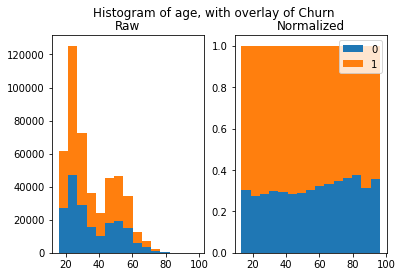

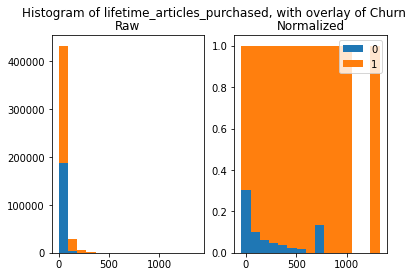

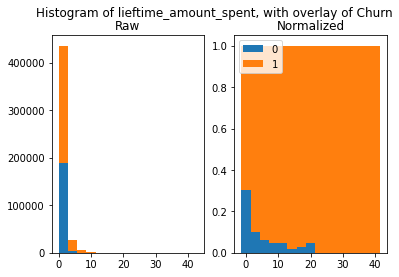

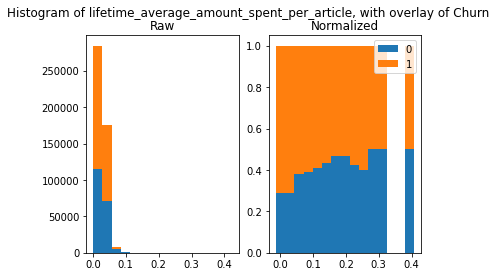

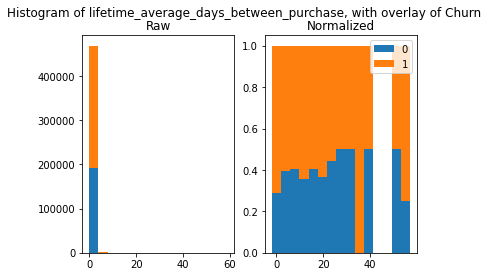

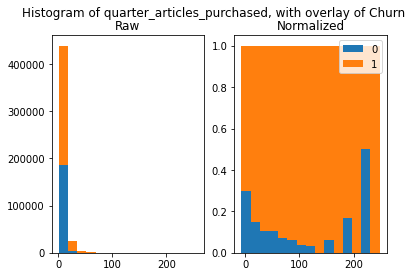

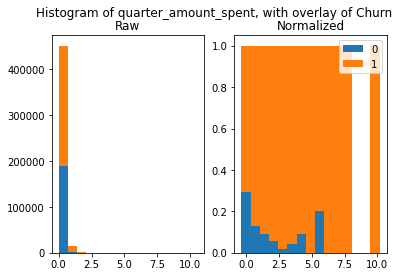

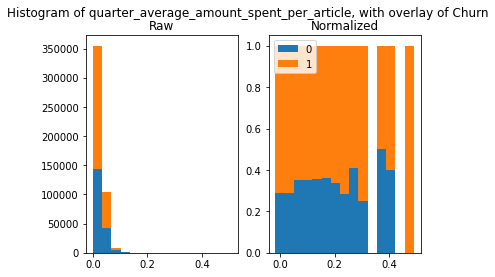

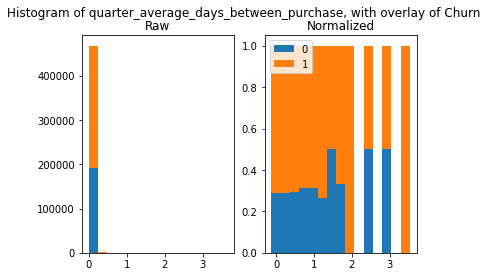

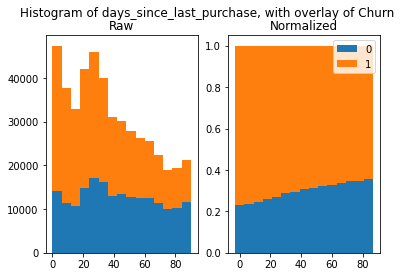

In [15]:
for col in num_variables:
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols= 2)

    y = df[df.churn == 1][col]
    n = df[df.churn == 0][col]
    
    n, bins, patches = ax1.hist([y, n], bins = 15, stacked = True, label = 'churn')
    n_table = np.column_stack((n[0], n[1]))
    n_sum = n_table.sum(axis=1)[:, None]
    n_norm = np.true_divide(n_table, n_sum)
    ourbins = np.column_stack((bins[0:15], bins[1:16]))
    
    ax2.bar(x = ourbins[:,0], 
            height = n_norm[:,1], 
            width = ourbins[:, 1] - ourbins[:, 0], 
            label = '0')
    ax2.bar(x = ourbins[:,0], 
            height = n_norm[:,1], 
            width = ourbins[:, 1] - ourbins[:, 0], 
            bottom = n_norm[:,0],
            label = '1')
    
    fig.suptitle('Histogram of {}, with overlay of Churn'.format(col))
    ax1.set_title('Raw')
    ax2.set_title('Normalized')
    plt.legend()

In [16]:
df[num_variables].describe()

,age,lifetime_articles_purchased,lieftime_amount_spent,lifetime_average_amount_spent_per_article,lifetime_average_days_between_purchase,quarter_articles_purchased,quarter_amount_spent,quarter_average_amount_spent_per_article,quarter_average_days_between_purchase,days_since_last_purchase
count,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000,469376.0000
mean,35.7225,34.7484,0.9875,0.0283,0.1193,6.6598,0.1872,0.0286,0.0084,37.6455
std,13.9363,43.8546,1.3870,0.0109,0.4861,8.0090,0.2506,0.0146,0.0337,25.0594
min,16.0000,1.0000,0.0008,0.0008,0.0000,1.0000,0.0001,0.0001,0.0000,0.0000
25%,24.0000,8.0000,0.2077,0.0219,0.0275,2.0000,0.0508,0.0195,0.0000,17.0000
50%,31.0000,21.0000,0.5430,0.0267,0.0613,4.0000,0.1067,0.0260,0.0000,34.0000
75%,48.0000,45.0000,1.2038,0.0327,0.1152,8.0000,0.2235,0.0339,0.0061,57.0000
max,99.0000,1375.0000,42.8785,0.4220,59.0000,257.0000,10.5247,0.5068,3.6465,90.0000


In [17]:
df[num_variables].skew()

age                                          0.6816
lifetime_articles_purchased                  3.8021
lieftime_amount_spent                        4.5120
lifetime_average_amount_spent_per_article    3.1804
lifetime_average_days_between_purchase      36.7636
quarter_articles_purchased                   4.4433
quarter_amount_spent                         5.0867
quarter_average_amount_spent_per_article     3.1242
quarter_average_days_between_purchase       20.5338
days_since_last_purchase                     0.3499
dtype: float64

### Bivariate EDA

In [18]:
corr = df[num_variables].corr()
corr

,age,lifetime_articles_purchased,lieftime_amount_spent,lifetime_average_amount_spent_per_article,lifetime_average_days_between_purchase,quarter_articles_purchased,quarter_amount_spent,quarter_average_amount_spent_per_article,quarter_average_days_between_purchase,days_since_last_purchase
age,1.0000,0.0261,0.0479,0.1389,-0.0038,-0.0087,0.0218,0.1035,0.0080,0.0245
lifetime_articles_purchased,0.0261,1.0000,0.9495,0.0050,0.1308,0.6602,0.6307,-0.0028,0.1182,-0.1891
lieftime_amount_spent,0.0479,0.9495,1.0000,0.1601,0.1249,0.6313,0.6762,0.1009,0.1301,-0.1870
lifetime_average_amount_spent_per_article,0.1389,0.0050,0.1601,1.0000,0.0038,0.0020,0.1823,0.6889,0.0660,-0.0329
lifetime_average_days_between_purchase,-0.0038,0.1308,0.1249,0.0038,1.0000,0.1778,0.1634,-0.0004,0.4097,-0.0207
quarter_articles_purchased,-0.0087,0.6602,0.6313,0.0020,0.1778,1.0000,0.9198,-0.0295,0.2340,-0.2720
quarter_amount_spent,0.0218,0.6307,0.6762,0.1823,0.1634,0.9198,1.0000,0.2032,0.2607,-0.2687
quarter_average_amount_spent_per_article,0.1035,-0.0028,0.1009,0.6889,-0.0004,-0.0295,0.2032,1.0000,0.0782,-0.0389
quarter_average_days_between_purchase,0.0080,0.1182,0.1301,0.0660,0.4097,0.2340,0.2607,0.0782,1.0000,-0.0100
days_since_last_purchase,0.0245,-0.1891,-0.1870,-0.0329,-0.0207,-0.2720,-0.2687,-0.0389,-0.0100,1.0000


<AxesSubplot:>

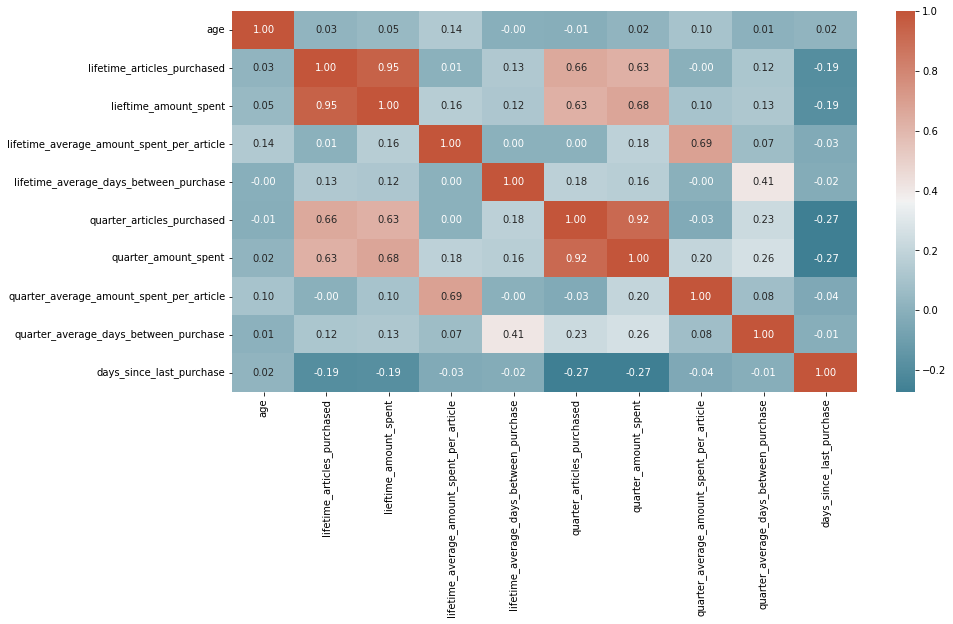

In [19]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize = (14,7))
sns.heatmap(corr, 
            cmap = cmap,
            annot = True , 
            fmt = '.2f')

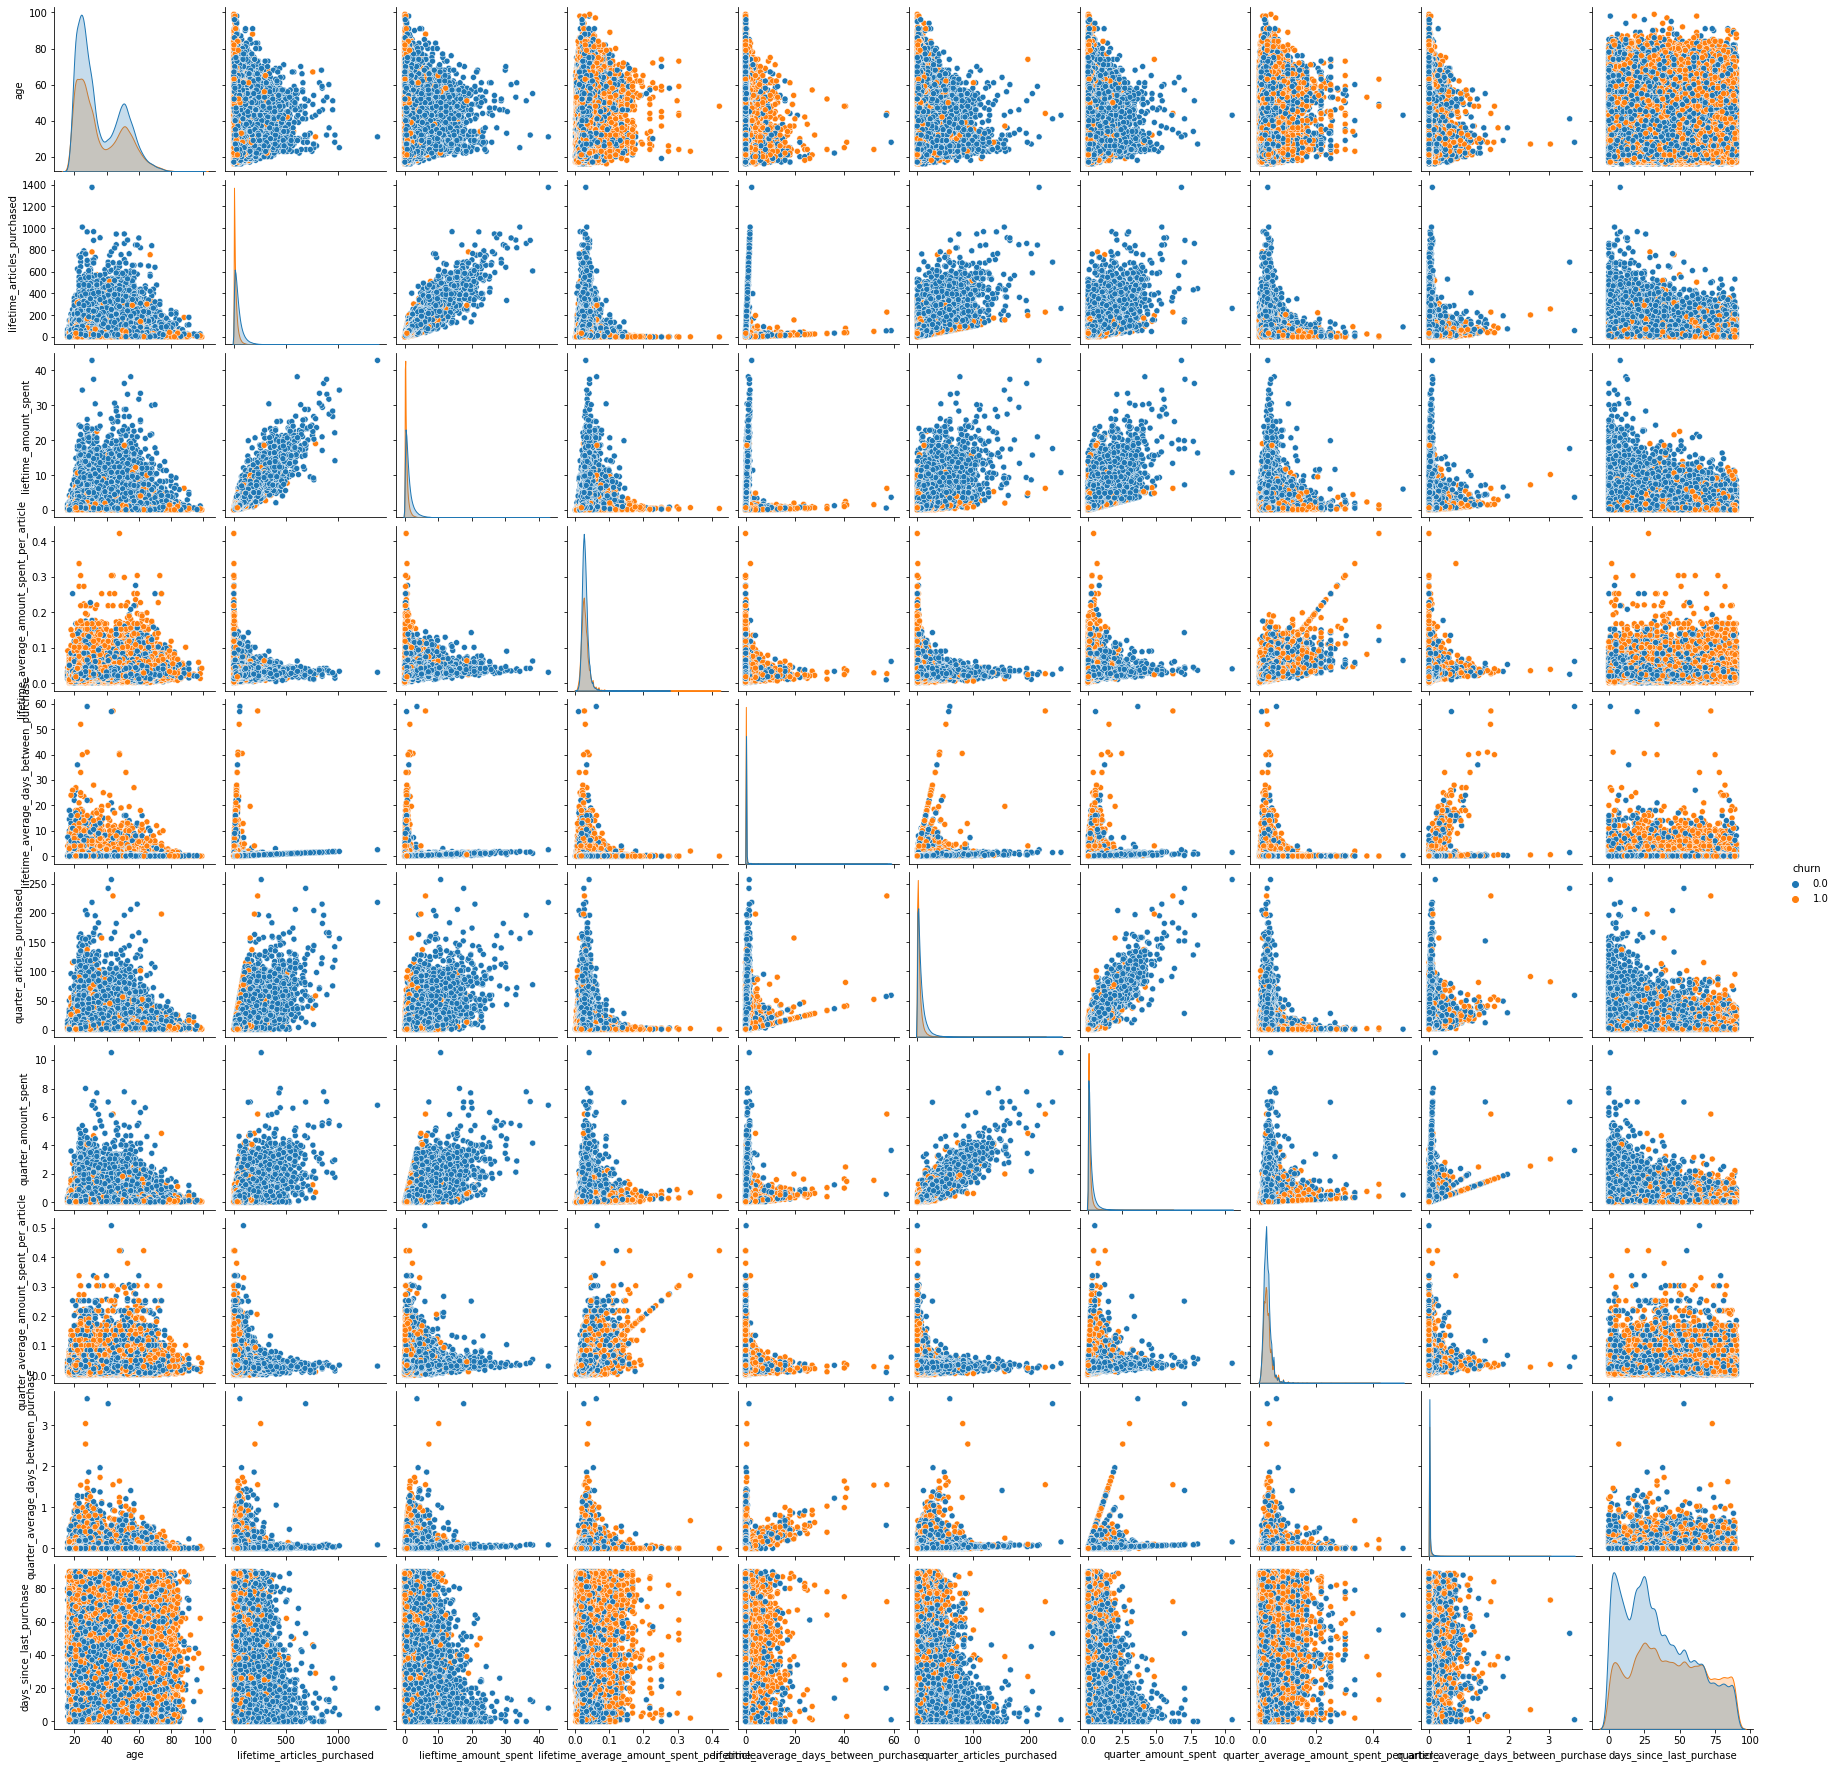

In [21]:
pair_plot_variables = ['age', 
                       'lifetime_articles_purchased', 
                       'lieftime_amount_spent', 
                       'lifetime_average_amount_spent_per_article', 
                       'lifetime_average_days_between_purchase',  
                       'quarter_articles_purchased', 
                       'quarter_amount_spent', 
                       'quarter_average_amount_spent_per_article', 
                       'quarter_average_days_between_purchase', 
                       'days_since_last_purchase', 
                       'churn']
sns.pairplot(df[pair_plot_variables], hue = 'churn')

### Shutting Down Kernel To Release Resources

In [22]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [ ]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}